In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
%matplotlib inline

In [23]:
# From https://pundit.pratt.duke.edu/wiki/Python:Ordinary_Differential_Equations/Examples
def state_plotter(times, states, fig_num):
    num_states = np.shape(states)[0]
    num_cols = int(np.ceil(np.sqrt(num_states)))
    num_rows = int(np.ceil(num_states / num_cols))
    plt.figure(fig_num, figsize=(12,6))
    plt.clf()
    fig, ax = plt.subplots(num_rows, num_cols, num=fig_num, clear=True,
                         squeeze=False)
    for n in range(num_states):
        row = n // num_cols
        col = n % num_cols
        ax[row][col].plot(times, states[n], 'k,')
        ax[row][col].set(xlabel='Time',
                         ylabel='$y_{:0.0f}(t)$'.format(n),
                         title='$y_{:0.0f}(t)$ vs. Time'.format(n))
        
    for n in range(num_states, num_rows * num_cols):
        fig.delaxes(ax[n // num_cols][n % num_cols])

    fig.tight_layout()

# MCO

The Newton's Second Law equation of motion is
$$
\dot{\omega}_{\phi} = \frac{\mu}{I}\left [ B_{field} \sin \phi + 
B_{drive} \cos \phi \sin \omega_d t \right ] - \frac{\beta 
\omega_{\phi}}{I}
$$

When the amplitudes are small $\sin \phi \approx \phi$, then for the undriven, undampled oscillator the equation of motion is that for simple harmonic motion

$$
\dot{\omega}_{\phi} = \frac{\mu B_{field}}{I} \phi
$$

I define $\omega_0^2 = \frac{\mu B_{field}}{I} \phi$, $b = \frac{B_{field}}{B_{drive}}$ and 
$\gamma = \frac{\beta}{I}$,
then the equation of the MCO can be written

$$
\dot{\omega}_{\phi} = \omega_0^2 \left [
\sin \phi + b \cos \phi \sin \omega_d t \right ] 
- \gamma \omega_{\phi}
$$

with 

$$
\omega_{\phi} = \dot{\phi}
$$


# Define Global Constants

In [26]:
OMEGA_0 = 1.0
OMEGA_0_SQ = OMEGA_0**2
b = 0.01
OMEGA_D = 0.9 * OMEGA_0
GAMMA = 0.01

# Define ODE Derivative Function

In [11]:
# %% Define derivative function

def f(t, y):
    # t = time
    # y[0] = phi
    # y[1] = omega
    global OMEGA_0_SQ, b, OMEGA_D, GAMMA
    phiDot = y[1]
    omegaDot = OMEGA_0_SQ * (np.sin(y[0]) + b * np.cos(y[0]) * np.sin(OMEGA_D * t)) - GAMMA * y[1]
    return np.array((phiDot, omegaDot))

# Initialize, Run, and Plot

CPU times: user 4min 25s, sys: 5.65 s, total: 4min 31s
Wall time: 4min 30s


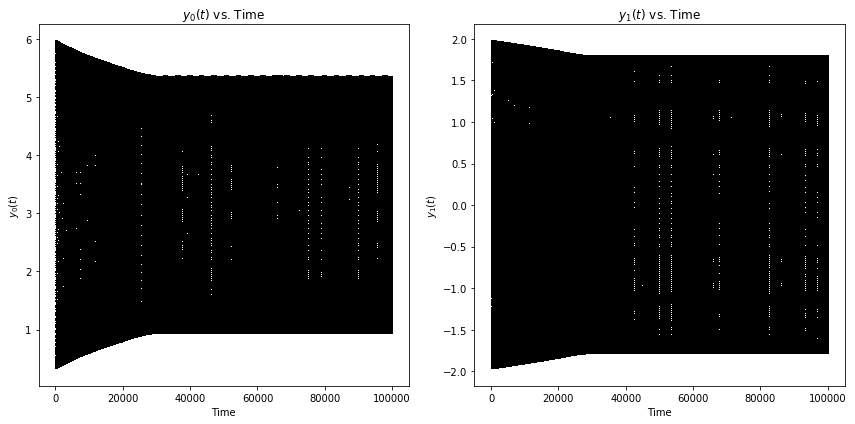

In [79]:
%%time
# Globals
OMEGA_0 = 1.0
OMEGA_0_SQ = OMEGA_0**2
b = 0.0
OMEGA_D = 0.9 * OMEGA_0
GAMMA = 0.0

# Initialize
nPoints = 1000000
DT = 0.1
DT2 = DT * DT
t = np.arange(0, nPoints * DT, DT)
yinit = np.array([0.1 * np.pi, 0.0])

# Run
sol = solve_ivp(lambda t, y: f(t, y), 
                [t[0], t[-1]], yinit, t_eval=t, method='Radau')

# Plot
state_plotter(sol.t, sol.y, 1)

# Phase Plot

CPU times: user 135 ms, sys: 28.1 ms, total: 163 ms
Wall time: 65 ms


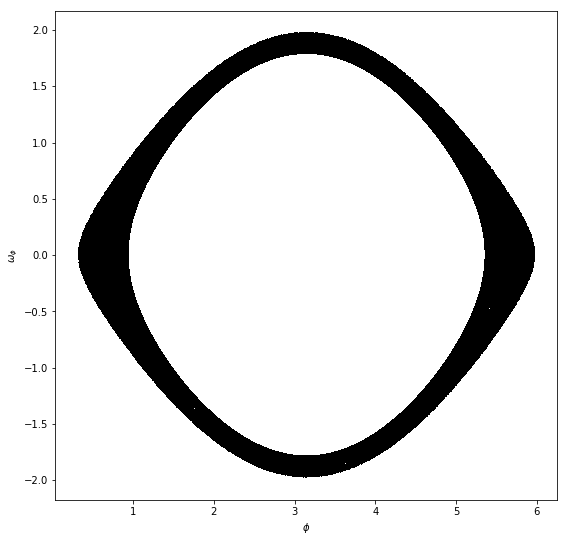

In [80]:
%%time
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111)
ax.plot(sol.y[0], sol.y[1], 'k,')
ax.set_xlabel('$\phi$')
ax.set_ylabel('$\omega_{\phi}$')

# Velocity Verlet Integration

In [65]:
def velocityVerlet(i, y, t):
    accHalfHalf = 0.5 * OMEGA_0_SQ * (np.sin(y[0,i]) + b * np.cos(y[0,i]) * np.sin(OMEGA_D * t[i])) - GAMMA * y[1,i]
    y[0,i+1] = y[0,i] + y[1,i] * DT + accHalfHalf * DT2
    accFullHalf = 0.5 * OMEGA_0_SQ * (np.sin(y[0,i+1]) + b * np.cos(y[0,i+1]) * np.sin(OMEGA_D * t[i+1])) - \
      GAMMA * y[1,i]
    y[1,i+1] = y[1,i] + (accHalfHalf + accFullHalf) * DT

CPU times: user 15.5 s, sys: 265 ms, total: 15.8 s
Wall time: 15.1 s


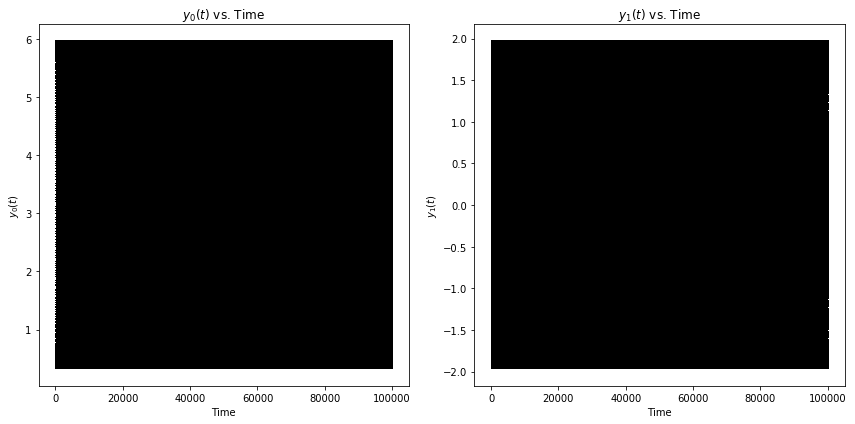

In [77]:
%%time
# Globals
OMEGA_0 = 1.0
OMEGA_0_SQ = OMEGA_0**2
b = 0.0
OMEGA_D = 0.9 * OMEGA_0
GAMMA = 0.0

# Initialize
nPoints = 1000000
DT = 0.1
DT2 = DT * DT
t = np.arange(0, nPoints * DT, DT)
yinit = np.array([0.1 * np.pi, 0.0])
y = np.zeros((2,nPoints), dtype='float64')
y[0,0] = yinit[0]
y[0,1] = yinit[1]

# Run
for i in xrange(nPoints-1):
    velocityVerlet(i, y, t)
# Plot
state_plotter(t, y, 1)

Text(0,0.5,'$\\omega_{\\phi}$')

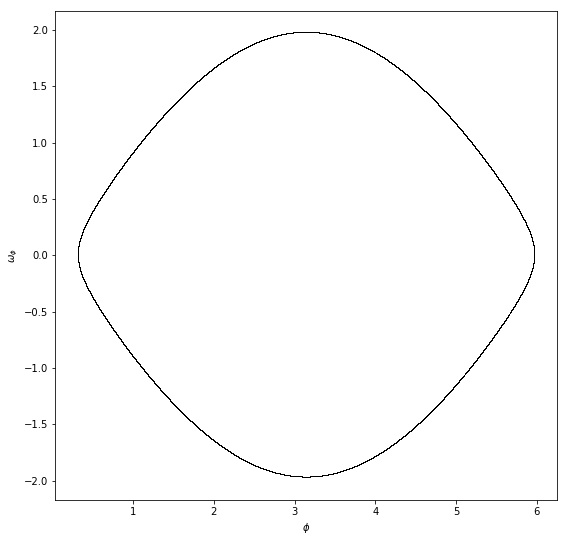

In [78]:
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111)
ax.plot(y[0], y[1], 'k,')
ax.set_xlabel('$\phi$')
ax.set_ylabel('$\omega_{\phi}$')